## Importing Libraries

In [1]:
# General Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# CV
from sklearn.model_selection import GridSearchCV

# ROC curve
from sklearn.metrics import RocCurveDisplay

# Confusion matrix result
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

## Import Test and Train data

In [2]:
train_data=pd.read_csv('Banking Dataset - Marketing Targets - Train.csv')
test_data=pd.read_csv('Banking Dataset - Marketing Targets - Test.csv')
train_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,29.0,10.0,0.0,3.0,0.0,0.000000,0.0,1.0,1.0,15.0,2.0,317.0,5.0,-1.0,0.0,0.0,0.0
1,57.0,0.0,2.0,1.0,0.0,396.000000,1.0,0.0,1.0,12.0,3.0,108.0,2.0,-1.0,0.0,0.0,0.0
2,54.0,3.0,0.0,3.0,0.0,714.000000,1.0,0.0,1.0,5.0,0.0,225.0,1.0,-1.0,0.0,0.0,0.0
3,52.0,7.0,0.0,1.0,0.0,2072.000000,0.0,0.0,1.0,10.0,2.0,224.0,1.0,-1.0,0.0,0.0,0.0
4,34.0,0.0,0.0,0.0,0.0,1778.000000,1.0,0.0,1.0,4.0,5.0,358.0,1.0,162.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40684,44.0,10.0,1.0,3.0,0.0,1360.860891,1.0,0.0,0.0,18.0,1.0,2093.0,1.0,-1.0,0.0,0.0,1.0
40685,23.0,11.0,1.0,1.0,0.0,508.000000,1.0,0.0,1.0,8.0,11.0,233.0,1.0,92.0,1.0,1.0,0.0
40686,34.0,1.0,2.0,0.0,0.0,1317.000000,0.0,0.0,1.0,15.0,0.0,239.0,1.0,-1.0,0.0,0.0,0.0
40687,33.0,7.0,0.0,1.0,0.0,165.000000,1.0,0.0,0.0,7.0,0.0,111.0,1.0,-1.0,0.0,0.0,0.0


In [3]:
X_col=['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']
Y_col=['y']

## Finding best model

In [4]:
dtc = DecisionTreeClassifier(random_state=0, )
parameters={'ccp_alpha':np.arange(0,0.2,0.01),'max_depth':np.arange(1,101,5)}
clf = GridSearchCV(dtc, parameters)
clf.fit(train_data[X_col], train_data[Y_col])


GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'ccp_alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19]),
                         'max_depth': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])})

In [5]:
clf.best_params_

{'ccp_alpha': 0.0, 'max_depth': 6}

## Display confusion matrix and ROC curve for train data

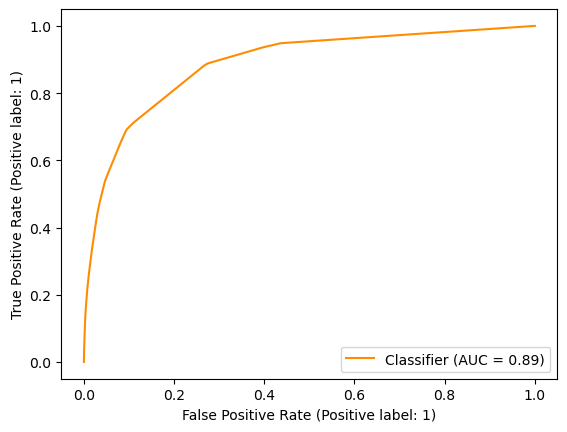

In [7]:
RocCurveDisplay.from_predictions(
    np.array(train_data['y']), clf.predict_proba(train_data[X_col])[::,1],
    color="darkorange",
)

              precision    recall  f1-score   support

          No       0.93      0.97      0.95     35948
         Yes       0.66      0.44      0.53      4741

    accuracy                           0.91     40689
   macro avg       0.80      0.71      0.74     40689
weighted avg       0.90      0.91      0.90     40689



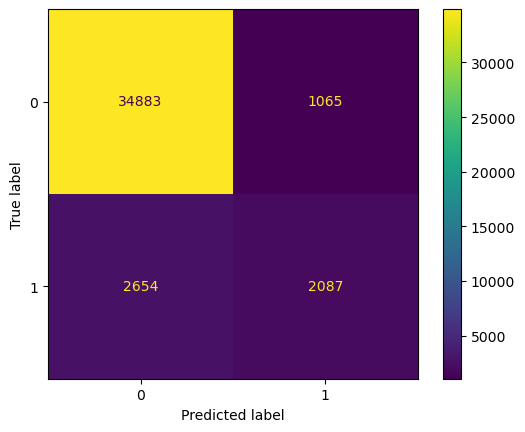

In [8]:
y_true=train_data['y']
y_pred=clf.predict(train_data[X_col])
print(classification_report(y_true, y_pred, target_names=['No','Yes']))
ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred)).plot()

## Display confusion matrix and ROC curve for test data


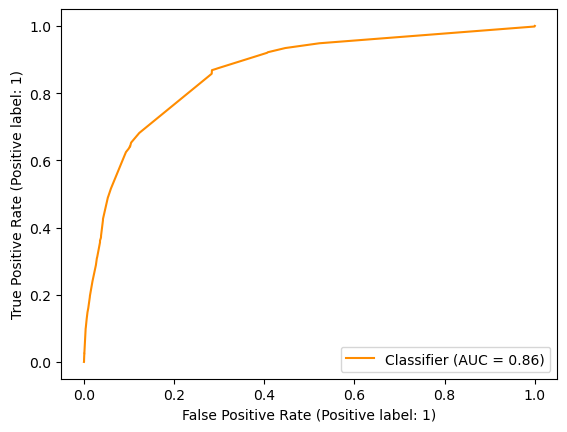

In [9]:
RocCurveDisplay.from_predictions(
    np.array(test_data[Y_col]).ravel(), clf.predict_proba(test_data[X_col])[::,1],
    color="darkorange",
)

              precision    recall  f1-score   support

          No       0.91      0.96      0.94      3960
         Yes       0.58      0.37      0.45       562

    accuracy                           0.89      4522
   macro avg       0.75      0.67      0.69      4522
weighted avg       0.87      0.89      0.88      4522



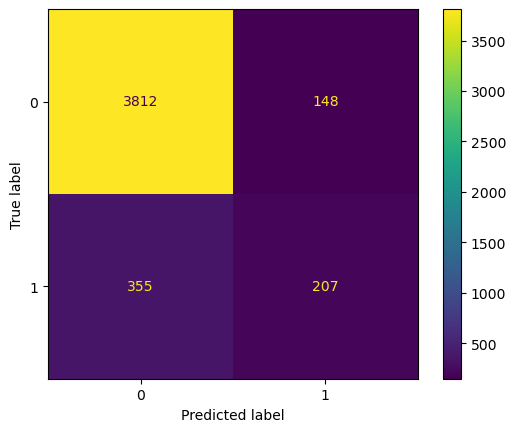

In [10]:
y_pred=clf.predict(test_data[X_col])
y_true=test_data['y']
print(classification_report(y_true, y_pred,target_names=['No','Yes']))
ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred)).plot()